In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
import os

In [2]:
project_root = 'H:/My Drive/my computer/Data Science/Wind predictor'
os.chdir(project_root)

# Read data
df = pd.read_csv('Data/IMS_data.csv')
df.head()

,datetime,Rain,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,TG,Grad,WS1mm,Ws10mm,Time,TW
0,2022-10-13T00:00:00+03:00,0.0,2.4,323.0,2.1,324.0,1.0,16.2,91.0,16.4,16.2,14.5,0.0,2.3,2.2,2354.0,-9999.0
1,2022-10-13T00:10:00+03:00,0.0,2.8,329.0,2.0,332.0,4.1,16.2,91.0,16.4,16.2,14.5,0.0,2.3,2.1,6.0,-9999.0
2,2022-10-13T00:20:00+03:00,0.0,2.3,338.0,1.9,336.0,2.6,16.4,92.0,16.5,16.3,14.7,0.0,2.2,2.0,11.0,-9999.0
3,2022-10-13T00:30:00+03:00,0.0,2.2,338.0,1.6,349.0,5.7,16.4,92.0,16.5,16.4,15.1,0.0,2.1,2.0,21.0,-9999.0
4,2022-10-13T00:40:00+03:00,0.0,1.9,356.0,1.7,358.0,7.8,16.4,92.0,16.5,16.3,14.7,0.0,1.8,1.7,40.0,-9999.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52419 entries, 0 to 52418
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  52419 non-null  object 
 1   Rain      52419 non-null  float64
 2   WSmax     52419 non-null  float64
 3   WDmax     52419 non-null  float64
 4   WS        52419 non-null  float64
 5   WD        52419 non-null  float64
 6   STDwd     52419 non-null  float64
 7   TD        52419 non-null  float64
 8   RH        52419 non-null  float64
 9   TDmax     52419 non-null  float64
 10  TDmin     52419 non-null  float64
 11  TG        52419 non-null  float64
 12  Grad      52419 non-null  float64
 13  WS1mm     52419 non-null  float64
 14  Ws10mm    52419 non-null  float64
 15  Time      52419 non-null  float64
 16  TW        52419 non-null  float64
dtypes: float64(16), object(1)
memory usage: 6.8+ MB


In [4]:
df.isna().sum()

datetime    0
Rain        0
WSmax       0
WDmax       0
WS          0
WD          0
STDwd       0
TD          0
RH          0
TDmax       0
TDmin       0
TG          0
Grad        0
WS1mm       0
Ws10mm      0
Time        0
TW          0
dtype: int64

In [5]:
# Read data
df.describe()

,Rain,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,TG,Grad,WS1mm,Ws10mm,Time,TW
count,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.0
mean,0.004300,5.483674,203.767813,3.762338,203.863904,12.793495,19.290727,58.936931,19.495212,19.091928,19.660268,224.461741,4.685606,4.019165,1176.307331,-9999.0
std,0.064804,3.010778,120.105561,2.128870,119.896986,9.831317,7.001355,23.569494,7.041120,6.965604,10.207146,313.620635,2.518057,2.169326,692.231834,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,-0.400000,-4.000000,0.000000,0.000000,0.000000,-9999.0
25%,0.000000,3.100000,76.000000,2.100000,74.000000,6.700000,13.900000,39.000000,14.100000,13.800000,11.700000,0.000000,2.700000,2.300000,558.000000,-9999.0
50%,0.000000,5.000000,260.000000,3.400000,258.000000,10.300000,19.100000,58.000000,19.300000,19.000000,18.200000,3.000000,4.200000,3.600000,1158.000000,-9999.0
75%,0.000000,7.500000,312.000000,5.100000,312.000000,15.600000,24.200000,80.000000,24.400000,23.900000,26.200000,421.000000,6.400000,5.400000,1756.000000,-9999.0
max,4.800000,20.200000,358.000000,13.600000,360.000000,100.000000,39.900000,100.000000,40.300000,39.500000,48.100000,1212.000000,18.200000,14.400000,2359.000000,-9999.0


In [6]:
# Apply date as index and delete TW column
df.drop(columns=['TW','Time'], axis=1, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
df.set_index('datetime', inplace=True)

In [7]:
hourly_means = df.resample('H').mean()
hourly_means.drop(columns=['Rain'], axis=1, inplace=True)

print(hourly_means.head())


                              WSmax       WDmax        WS          WD  \
datetime                                                                
2022-10-12 21:00:00+00:00  2.283333  339.000000  1.866667  341.666667   
2022-10-12 22:00:00+00:00  2.600000  293.833333  2.266667  295.500000   
2022-10-12 23:00:00+00:00  2.700000    1.166667  2.450000    2.333333   
2022-10-13 00:00:00+00:00  3.233333  174.333333  2.783333  174.833333   
2022-10-13 01:00:00+00:00  2.783333  228.000000  2.333333  229.000000   

                              STDwd         TD         RH      TDmax  \
datetime                                                               
2022-10-12 21:00:00+00:00  3.883333  16.350000  91.666667  16.466667   
2022-10-12 22:00:00+00:00  3.516667  16.233333  92.000000  16.383333   
2022-10-12 23:00:00+00:00  2.450000  16.083333  91.666667  16.183333   
2022-10-13 00:00:00+00:00  2.300000  15.783333  91.000000  15.900000   
2022-10-13 01:00:00+00:00  4.333333  15.733333  91.00000

In [8]:
hourly_means.head()

,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,TG,Grad,WS1mm,Ws10mm
datetime,,,,,,,,,,,,,
2022-10-12 21:00:00+00:00,2.283333,339.000000,1.866667,341.666667,3.883333,16.350000,91.666667,16.466667,16.300000,14.700000,0.0,2.116667,1.983333
2022-10-12 22:00:00+00:00,2.600000,293.833333,2.266667,295.500000,3.516667,16.233333,92.000000,16.383333,16.150000,14.700000,0.0,2.433333,2.283333
2022-10-12 23:00:00+00:00,2.700000,1.166667,2.450000,2.333333,2.450000,16.083333,91.666667,16.183333,16.016667,14.866667,0.0,2.600000,2.533333
2022-10-13 00:00:00+00:00,3.233333,174.333333,2.783333,174.833333,2.300000,15.783333,91.000000,15.900000,15.700000,14.383333,0.0,2.966667,2.816667
2022-10-13 01:00:00+00:00,2.783333,228.000000,2.333333,229.000000,4.333333,15.733333,91.000000,15.816667,15.633333,14.133333,0.0,2.583333,2.550000


In [9]:
hourly_means.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2022-10-12 21:00:00+00:00 to 2023-10-13 20:00:00+00:00
Freq: H
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WSmax   8740 non-null   float64
 1   WDmax   8740 non-null   float64
 2   WS      8740 non-null   float64
 3   WD      8740 non-null   float64
 4   STDwd   8740 non-null   float64
 5   TD      8740 non-null   float64
 6   RH      8740 non-null   float64
 7   TDmax   8740 non-null   float64
 8   TDmin   8740 non-null   float64
 9   TG      8740 non-null   float64
 10  Grad    8740 non-null   float64
 11  WS1mm   8740 non-null   float64
 12  Ws10mm  8740 non-null   float64
dtypes: float64(13)
memory usage: 960.8 KB


In [10]:
n = len(hourly_means)
train_df = hourly_means[0 : int(n * 0.7)]
val_df = hourly_means[int(n * 0.7): int(n * 0.9)]
test_df = hourly_means[int(n * 0.9):]

train_df_un = train_df.copy(deep=True)
val_df_un = val_df.copy(deep=True)
test_df_un = test_df.copy(deep=True)

train_df_un = train_df_un.mask(train_df_un.WS == -1, np.nan)
val_df_un = val_df_un.mask(val_df_un.WS == -1, np.nan)
test_df_un = test_df_un.mask(test_df_un.WS == -1, np.nan)

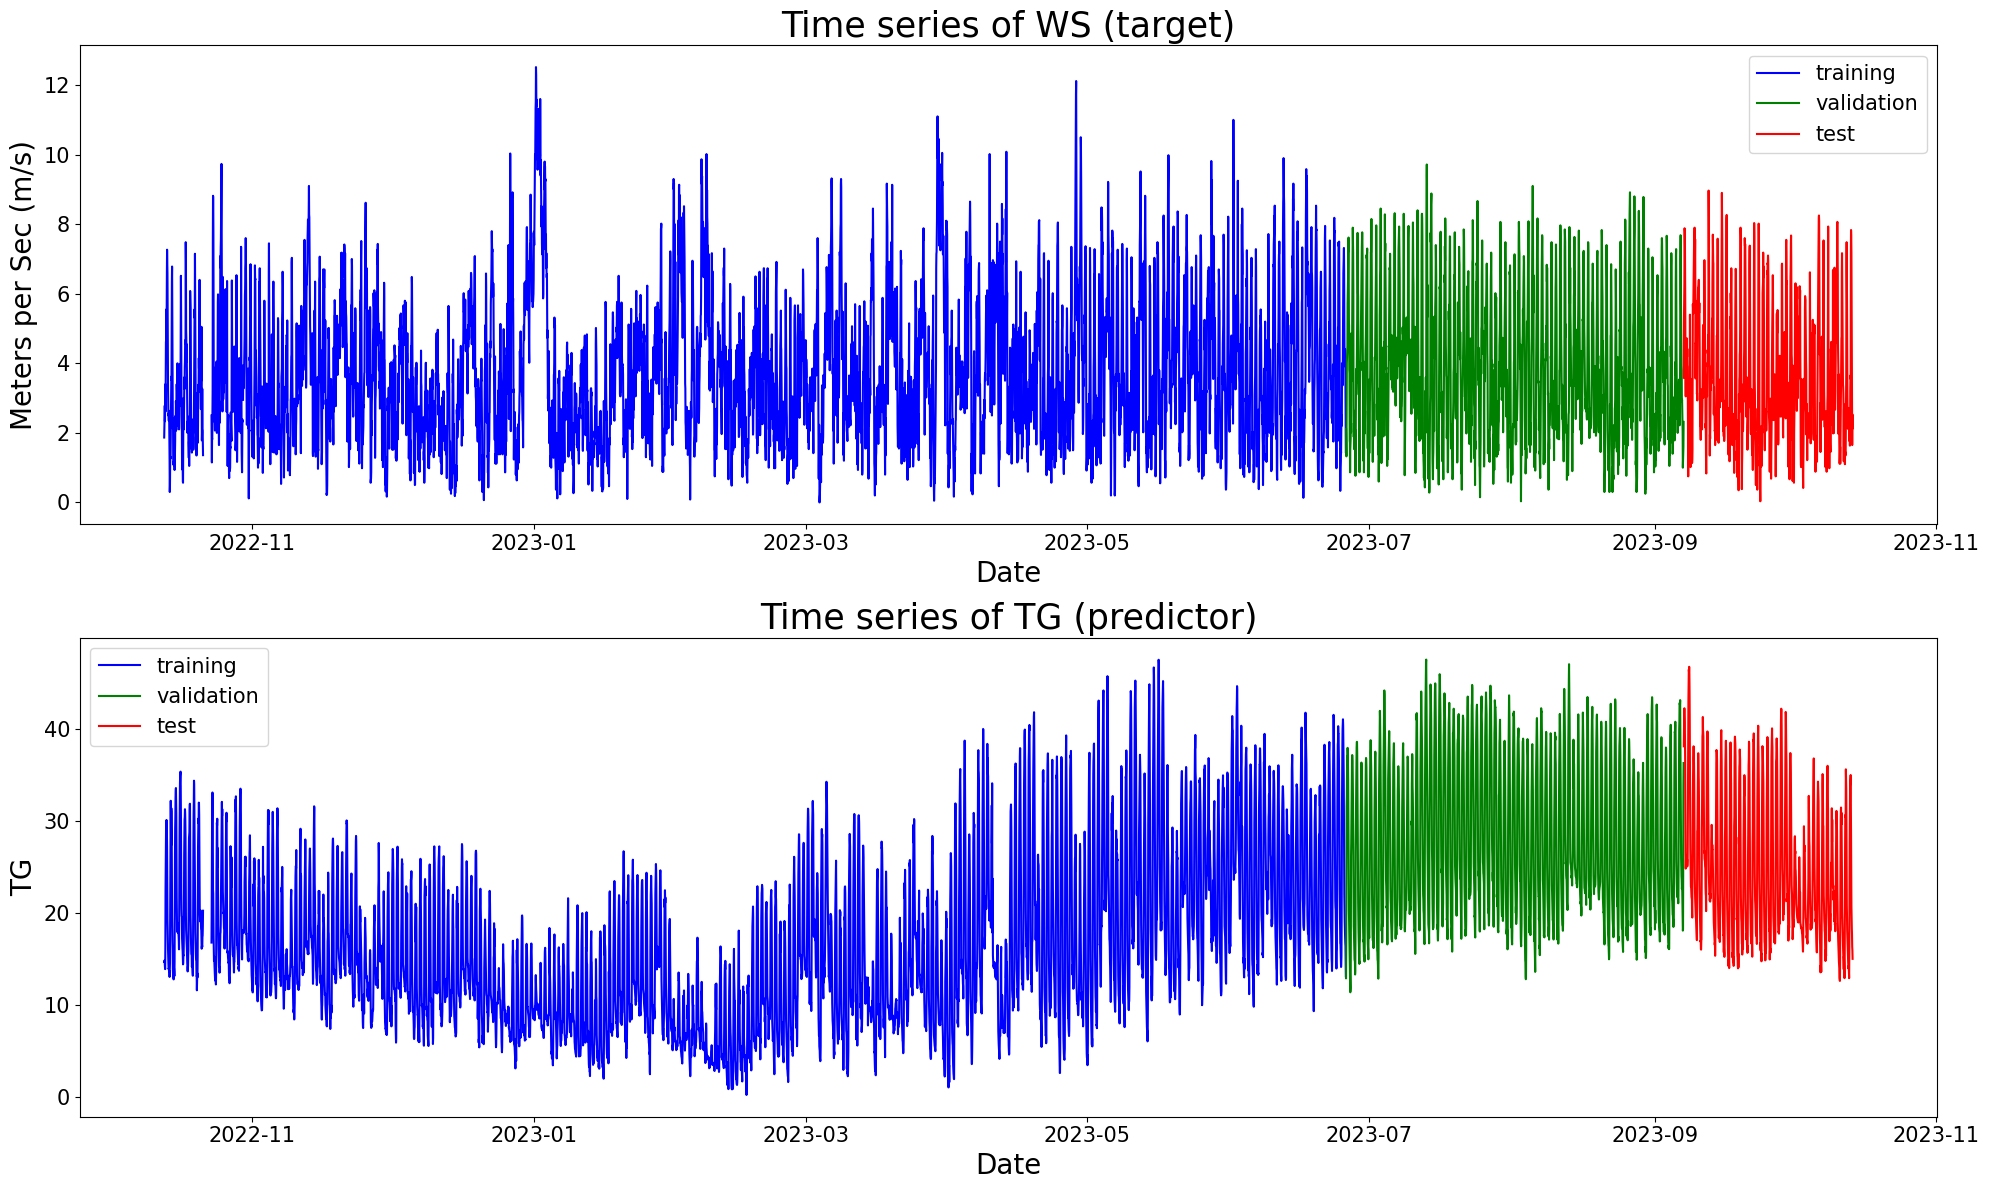

In [11]:
FONT_SIZE_TICKS = 15
FONT_SIZE_TITLE = 25
FONT_SIZE_AXES = 20


def plot_feature(feature):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

    ax1.plot(train_df["WS"], color="blue", label="training")
    ax1.plot(val_df["WS"], color="green", label="validation")
    ax1.plot(test_df["WS"], color="red", label="test")
    ax1.set_title("Time series of WS (target)", fontsize=FONT_SIZE_TITLE)
    ax1.set_ylabel("Meters per Sec (m/s)", fontsize=FONT_SIZE_AXES)
    ax1.set_xlabel("Date", fontsize=FONT_SIZE_AXES)
    ax1.legend(fontsize=15)
    ax1.tick_params(axis="both", labelsize=FONT_SIZE_TICKS)

    ax2.plot(train_df[feature], color="blue", label="training")
    ax2.plot(val_df[feature], color="green", label="validation")
    ax2.plot(test_df[feature], color="red", label="test")
    ax2.set_title(f"Time series of {feature} (predictor)", fontsize=FONT_SIZE_TITLE)
    ax2.set_ylabel(f"{feature}", fontsize=FONT_SIZE_AXES)
    ax2.set_xlabel("Date", fontsize=FONT_SIZE_AXES)
    ax2.legend(fontsize=15)
    ax2.tick_params(axis="both", labelsize=FONT_SIZE_TICKS)

    plt.tight_layout()
    plt.show()

# Create interactive plot
feature_selection = widgets.Dropdown(
    options=[f for f in list(train_df.columns) if f != "WS"],
    description="Feature",
)

interactive_plot = interactive(plot_feature, feature=feature_selection)
output = interactive_plot.children[-1]
output.layout.height = '500px'
# interactive_plot
plot_feature('TG')

In [12]:
# Parameters
n_days = 3  # Using the previous 3 days (or data points) to compute the average
time_horizon = 2  # Predicting 2 steps into the future

# Compute the rolling average
moving_avg = test_df['WS'].rolling(window=n_days*24).mean()

# Shift the values to get a prediction for a future time step
predicted_WS = moving_avg.shift(-time_horizon)

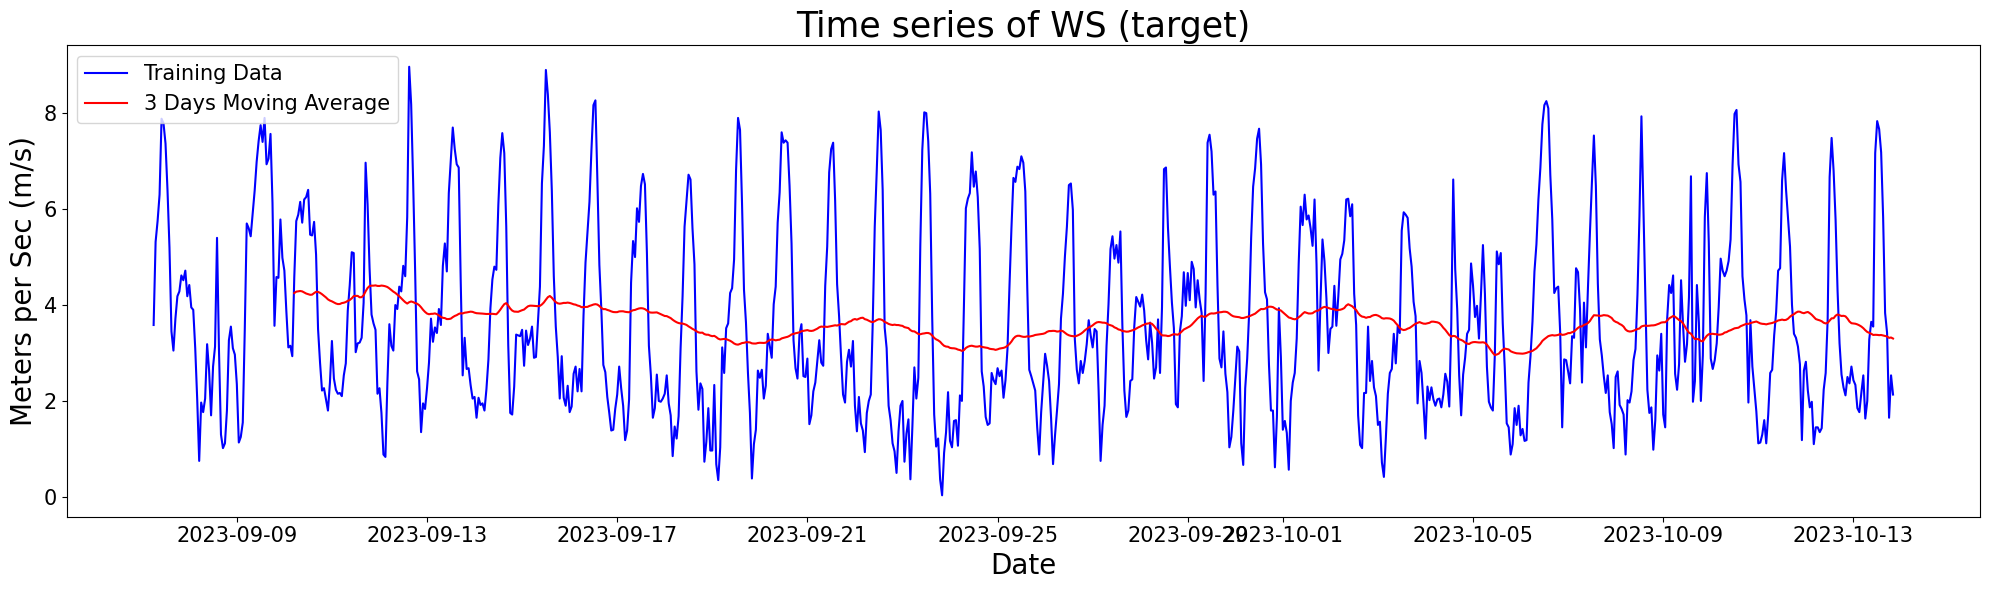

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(test_df.index, test_df["WS"], color="blue", label="Training Data")  # Use the DataFrame index for the x-axis
plt.plot(test_df.index, moving_avg, color="red", label=f"{n_days} Days Moving Average")  # Use the DataFrame index for the x-axis
plt.title("Time series of WS (target)", fontsize=FONT_SIZE_TITLE)
plt.ylabel("Meters per Sec (m/s)", fontsize=FONT_SIZE_AXES)
plt.xlabel("Date", fontsize=FONT_SIZE_AXES)
plt.legend(fontsize=15)
plt.tick_params(axis="both", labelsize=FONT_SIZE_TICKS)

plt.tight_layout()
plt.show()


In [14]:
# Calculate the absolute error
abs_error = abs(test_df['WS'] - moving_avg)
mae = abs_error.mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.58


In [15]:
train_mean = train_df.mean()
train_std = train_df.std()

train_data = (train_df - train_mean) / train_std
val_data = (val_df - train_mean) / train_std
test_data = (test_df - train_mean) / train_std

In [16]:
train_data.head()

,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,TG,Grad,WS1mm,Ws10mm
datetime,,,,,,,,,,,,,
2022-10-12 21:00:00+00:00,-1.081198,1.447895,-0.908098,1.463987,-1.117353,-0.059655,1.327142,-0.073183,-0.035834,-0.198144,-0.695079,-1.039087,-0.950561
2022-10-12 22:00:00+00:00,-0.974769,1.019688,-0.713977,1.027825,-1.163397,-0.078804,1.341667,-0.086761,-0.060625,-0.198144,-0.695079,-0.909530,-0.808733
2022-10-12 23:00:00+00:00,-0.941160,-1.754969,-0.625005,-1.741879,-1.297342,-0.103425,1.327142,-0.119347,-0.082661,-0.179781,-0.695079,-0.841343,-0.690544
2022-10-13 00:00:00+00:00,-0.761912,-0.113244,-0.463237,-0.112178,-1.316178,-0.152668,1.298091,-0.165511,-0.134998,-0.233032,-0.695079,-0.691330,-0.556595
2022-10-13 01:00:00+00:00,-0.913153,0.395548,-0.681623,0.399564,-1.060845,-0.160875,1.298091,-0.179088,-0.146016,-0.260576,-0.695079,-0.848161,-0.682664
